In [5]:
# importing all necessary libraries
import numpy as np
import pandas as pd

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


Data Ingestion

In [6]:
# Adjust the display
pd.set_option("display.max_column", None)
pd.set_option("display.width", 100)

In [7]:
# Load the data
data_path = r"archive.zip" # I am using relative path 
df = pd.read_csv(data_path, low_memory=True,compression='zip') # This is how to load zipped csv file
# df.tail()

In [8]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15.0,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


In [9]:
df.head(7)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,1434,14.0,32.0,24.0,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"


Preliminary  Analysis

In [10]:
print("===DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

===DATASET OVERVIEW ===
Dataset shape: (7784664, 22)
memory usage: 5302.92 MB


In [11]:
# Lewts resume back with our original dataset which we have denoted as "df"
# Dataset shape and basic info

print("\n=== COLUMN INFORMATION ===")
print(f"List of columns: {df.columns}")
print("")
print(f"column details:{df.info()}")
print('\n== FIRST AND LAST 5 RECORDS ===')
print(df.head())
print("")
print(df.tail())

print("\n=== BASIC STATISTICS ===")
print(df.describe(include='all'))


=== COLUMN INFORMATION ===
List of columns: Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  f

Checking Out For Missing Data

In [53]:
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [13]:
df.isnull()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7784660,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7784661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7784662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Data Cleaning and  Preprocessing

In [14]:
df.Date

0          09/05/2015 01:30:00 PM
1          09/04/2015 11:30:00 AM
2          09/01/2018 12:01:00 AM
3          09/05/2015 12:45:00 PM
4          09/05/2015 01:00:00 PM
                    ...          
7784659    09/01/2022 05:00:00 AM
7784660    07/08/2022 12:00:00 AM
7784661    09/27/2022 11:00:00 AM
7784662    09/03/2022 10:25:00 AM
7784663    09/26/2022 07:20:00 PM
Name: Date, Length: 7784664, dtype: object

In [15]:
# checking if the data type to be sure its in pandas "datetime" format
print(df['Date'].dtype) # --> check the output
print(type(df['Date'][0])) # --> also check the output

object
<class 'str'>


Data Cleaning Pipeline

In [ ]:
print(f"Nunmbers of unique crime crime")


Nunmbers of unique crime crime


Descriptive Analysis(Numerical variables)


-> Using .describe() function.



-> assigning it to the varible name 'summary'

In [18]:
print("\nsummary statistics:")
print(df.describe())


summary statistics:
                 ID          Beat      District          Ward  Community Area  X Coordinate  \
count  7.784664e+06  7.784664e+06  7.784617e+06  7.169816e+06    7.171188e+06  7.697816e+06   
mean   7.026439e+06  1.185918e+03  1.129466e+01  2.275420e+01    3.748472e+01  1.164601e+06   
std    3.502657e+06  7.031335e+02  6.952422e+00  1.385106e+01    2.154115e+01  1.684658e+04   
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00  0.000000e+00   
25%    3.792574e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01  1.152976e+06   
50%    7.029327e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01  1.166110e+06   
75%    1.013113e+07  1.731000e+03  1.700000e+01  3.400000e+01    5.700000e+01  1.176372e+06   
max    1.305643e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01  1.205119e+06   

       Y Coordinate          Year      Latitude     Longitude  
count  7.697816e+06  7.784664e+06  7.697816e+06  7.697816e+

Univariate Analysis of District

In [19]:
# summary statistics
summary_stats = df['District'].describe()
print("summary statistics:")
print(summary_stats)
print()

summary statistics:
count    7.784617e+06
mean     1.129466e+01
std      6.952422e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.700000e+01
max      3.100000e+01
Name: District, dtype: float64



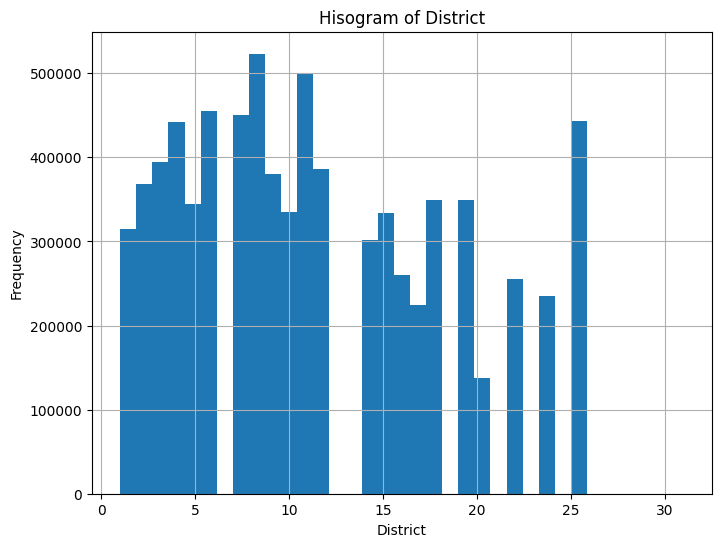

In [29]:
# Histogram
plt.figure(figsize=(8, 6))
df['District'].hist(grid=True, bins=35)
plt.title('Hisogram of District')
plt.xlabel('District')
plt.ylabel('Frequency')
# plt.xticks(range(int(df['District'].min()), int(df)['District'].max() + 1, 1))
plt.grid(True)
plt.show()

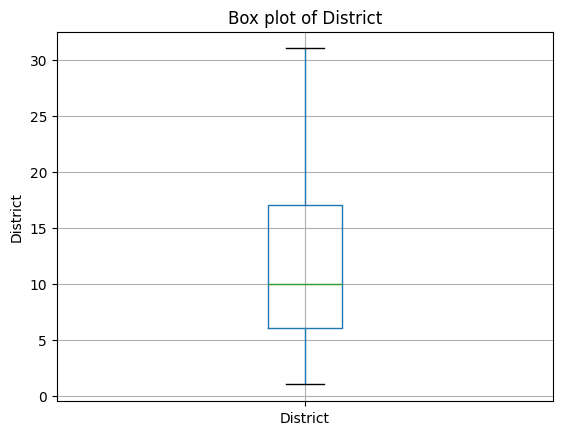

In [37]:
# Box plot
plt.Figure(figsize=(9, 7))
df.boxplot(column='District')
plt.title('Box plot of District')
plt.ylabel('District')
plt.grid(True)
plt.show()

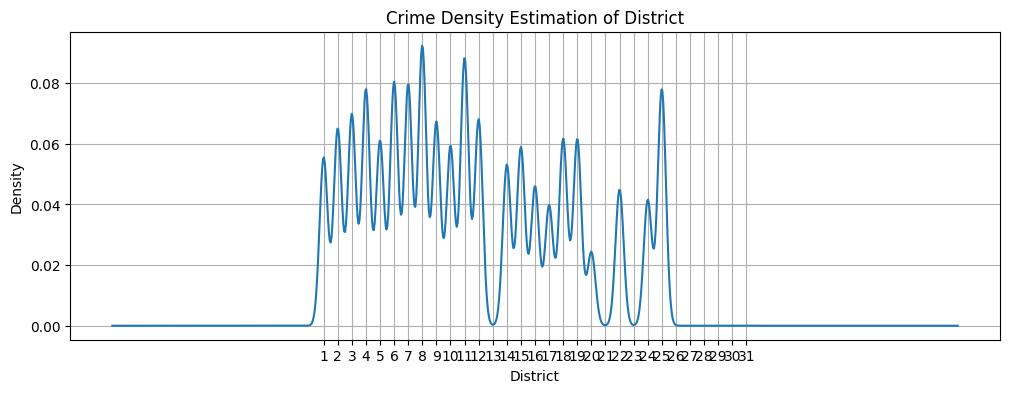

In [55]:
plt.figure(figsize=(12, 4))
df['District'].plot.kde()
plt.title('Crime Density Estimation of District')
plt.xlabel('District')
plt.ylabel('Density')
plt.xticks(range(int(df['District'].min()), int(df['District'].max()) + 1, 1))
plt.grid(True)
plt.show()

Analysing For Location Where Crimes Occurs The Most

In [ ]:
# Do you know the locations where most crimes occur?

crime_type_location = df.groupby('Location Description')['Primary Type'].value_counts()
crime_type_location

Location Description  Primary Type                    
ABANDONED BUILDING    NARCOTICS                           2999
                      BURGLARY                            1940
                      CRIMINAL TRESPASS                   1682
                      THEFT                               1566
                      CRIMINAL DAMAGE                     1102
                                                          ... 
WAREHOUSE             INTERFERENCE WITH PUBLIC OFFICER       1
                      STALKING                               1
WOODED AREA           HOMICIDE                               7
YARD                  HOMICIDE                             293
YMCA                  HOMICIDE                               3
Name: count, Length: 3142, dtype: int64

In [40]:
# Particular primary crime types that is prone to a particular Location Description

order_crime_location = crime_type_location.sort_values(ascending=False)
order_crime_location

Location Description              Primary Type                     
STREET                            THEFT                                444229
                                  CRIMINAL DAMAGE                      319276
APARTMENT                         BATTERY                              299282
RESIDENCE                         BATTERY                              293688
STREET                            MOTOR VEHICLE THEFT                  293665
                                                                        ...  
HIGHWAY / EXPRESSWAY              DECEPTIVE PRACTICE                        1
VEHICLE-COMMERCIAL - TROLLEY BUS  SEX OFFENSE                               1
                                  OTHER OFFENSE                             1
ABANDONED BUILDING                PUBLIC INDECENCY                          1
                                  CONCEALED CARRY LICENSE VIOLATION         1
Name: count, Length: 3142, dtype: int64

In [41]:
# Crime locations... lets look at the top 20 locations of crime with the numbers of crimes that happens there...

crime_location = df.groupby('Location Description')['Primary Type'].count()
crime_location_20 = crime_location.sort_values(ascending=False).head(20)
crime_location_20

Location Description
STREET                            2026828
RESIDENCE                         1305843
APARTMENT                          879342
SIDEWALK                           728865
OTHER                              270026
PARKING LOT/GARAGE(NON.RESID.)     202991
ALLEY                              172812
SMALL RETAIL STORE                 147164
SCHOOL, PUBLIC, BUILDING           146387
RESIDENCE-GARAGE                   135543
RESTAURANT                         127259
RESIDENCE PORCH/HALLWAY            124210
VEHICLE NON-COMMERCIAL             124052
GROCERY FOOD STORE                  98701
DEPARTMENT STORE                    98578
GAS STATION                         86473
RESIDENTIAL YARD (FRONT/BACK)       75151
COMMERCIAL / BUSINESS OFFICE        60324
PARK PROPERTY                       58648
CHA PARKING LOT/GROUNDS             56107
Name: Primary Type, dtype: int64

Analysing To Know If Crimes Are Arrested Or Not

In [42]:
# Find out the number of arrests we have in the dataset
df['Arrest'].value_counts()

Arrest
False    5749900
True     2034764
Name: count, dtype: int64

In [44]:
arrest_data = df.groupby('Primary Type')['Arrest'].value_counts()
arrest_data

Primary Type       Arrest
ARSON              False       11604
                   True         1645
ASSAULT            False      399528
                   True       107768
BATTERY            False     1109916
                              ...   
STALKING           True          655
THEFT              False     1458482
                   True       183666
WEAPONS VIOLATION  True        78880
                   False       27538
Name: count, Length: 71, dtype: int64

In [45]:
arrest_data.sort_values(ascending=False)

Primary Type                      Arrest
THEFT                             False     1458482
BATTERY                           False     1109916
CRIMINAL DAMAGE                   False      827700
NARCOTICS                         True       743040
BURGLARY                          False      400153
                                             ...   
NON - CRIMINAL                    True            6
RITUALISM                         True            3
NON-CRIMINAL (SUBJECT SPECIFIED)  True            3
PUBLIC INDECENCY                  False           2
DOMESTIC VIOLENCE                 True            1
Name: count, Length: 71, dtype: int64

In [47]:
# change data types from boolean to string to use the data in the arrest and domestic columns
df['Arrest'] = df['Arrest'].astype(str)
df['Domestic'] = df['Domestic'].astype(str)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [48]:
total_arrests_made = df[df['Arrest'].str.contains('True')]
total_arrests_made

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
7,10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,06,1159734.0,1889313.0,2015,09/17/2015 11:37:18 AM,41.851989,-87.689219,"(41.851988885, -87.689219118)"
18,10224757,HY411388,09/05/2015 09:55:00 AM,088XX S PAULINA ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,2221,22.0,21.0,71.0,05,1166554.0,1846067.0,2015,02/10/2018 03:50:01 PM,41.733174,-87.665421,"(41.733173536, -87.665421067)"
30,10224770,HY411586,09/05/2015 12:40:00 PM,005XX W 61ST PL,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE PORCH/HALLWAY,True,False,711,7.0,20.0,68.0,04B,1173653.0,1864134.0,2015,02/10/2018 03:50:01 PM,41.782597,-87.638880,"(41.782597483, -87.638879769)"
35,10224778,HY411675,09/05/2015 02:44:00 PM,047XX N KEELER AVE,0560,ASSAULT,SIMPLE,SIDEWALK,True,False,1722,17.0,39.0,14.0,08A,1147525.0,1931300.0,2015,02/10/2018 03:50:01 PM,41.967448,-87.732951,"(41.967448012, -87.732951137)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784630,12841619,JF413240,09/27/2022 10:09:00 PM,001XX E CONGRESS DR,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,114,1.0,42.0,32.0,15,NaN,NaN,2022,10/04/2022 04:52:49 PM,NaN,NaN,NaN
7784642,12847508,JF420435,09/19/2022 02:43:00 PM,026XX N NARRAGANSETT AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,2512,25.0,36.0,19.0,06,1133297.0,1916857.0,2022,04/07/2023 04:59:45 PM,41.928077,-87.785606,"(41.928076536, -87.785606186)"
7784658,12847491,JF420379,09/16/2022 01:48:00 PM,026XX N NARRAGANSETT AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,2512,25.0,36.0,19.0,06,1133297.0,1916857.0,2022,04/07/2023 04:59:45 PM,41.928077,-87.785606,"(41.928076536, -87.785606186)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [49]:
len(total_arrests_made)

2034764

In [50]:
# Finding out the percentage of incidents that led to arrests
arrest_incidt = len(total_arrests_made) / len(df) * 100
print(round(arrest_incidt, 3))

26.138


In [51]:
arrest_per_crime = total_arrests_made['Primary Type'].value_counts()
arrest_per_crime

Primary Type
NARCOTICS                            743040
BATTERY                              312997
THEFT                                183666
CRIMINAL TRESPASS                    150299
ASSAULT                              107768
OTHER OFFENSE                         84985
WEAPONS VIOLATION                     78880
PROSTITUTION                          69567
CRIMINAL DAMAGE                       59566
DECEPTIVE PRACTICE                    46346
PUBLIC PEACE VIOLATION                32969
MOTOR VEHICLE THEFT                   30918
ROBBERY                               27331
BURGLARY                              24244
INTERFERENCE WITH PUBLIC OFFICER      16905
LIQUOR LAW VIOLATION                  14770
GAMBLING                              14511
OFFENSE INVOLVING CHILDREN            11031
SEX OFFENSE                            8328
HOMICIDE                               5931
CRIM SEXUAL ASSAULT                    4395
ARSON                                  1645
CONCEALED CARRY LIC

Analysing Domestic Related Crimes



Getting to know the proportion of domestic-related incidients compared to others.

In [52]:
df.columns
df['Domestic'].value_counts()
domestic_crime = df[df['Domestic'].str.contains('True')]
domestic_crime.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.67,"(41.815117282, -87.669999562)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
